# **EXPLORATORY DATA ANALYSIS WITH PYTHON:**

We will proceed as follow:

<img src="https://i0.wp.com/sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png" />



# **DATA EXPLORATION**

---



* Visualize
* Find missing
* Look for correlations

# *Preparations*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#*Importing Libraries*

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

# visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#*Input Dataset*

In [ ]:
df = pd.read_csv("/content/Crime.csv",encoding = "ISO-8859-1")
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


count    319073.000000
mean       2016.560586
std           0.996344
min        2015.000000
25%        2016.000000
50%        2017.000000
75%        2017.000000
max        2018.000000
Name: YEAR, dtype: float64


<ipython-input-9-5af934f72224>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




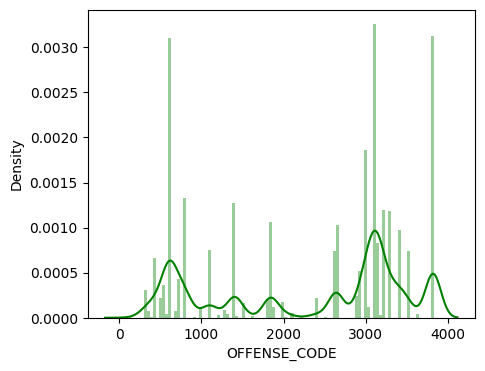

In [ ]:
print(df['YEAR'].describe())
plt.figure(figsize=(5, 4))
sns.distplot(df['OFFENSE_CODE'], color='g', bins=100, hist_kws={'alpha': 0.4});

 # *Quick Dataset Summary*

In [ ]:
print("The dimension:", df.shape)

The dimension: (319073, 17)


*  We have over 300K rows and 17 columns in our dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

* Do we have any Missing data?

In [ ]:
def missing_value_describe(data):
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")
missing_value_describe(df)

Number of columns with missing values: 6

Missing percentage (desceding):
SHOOTING    99.680637
Long         6.267845
Lat          6.267845
STREET       3.407057
DISTRICT     0.553165
UCR_PART     0.028207
dtype: float64


* Missingno - Missing Data

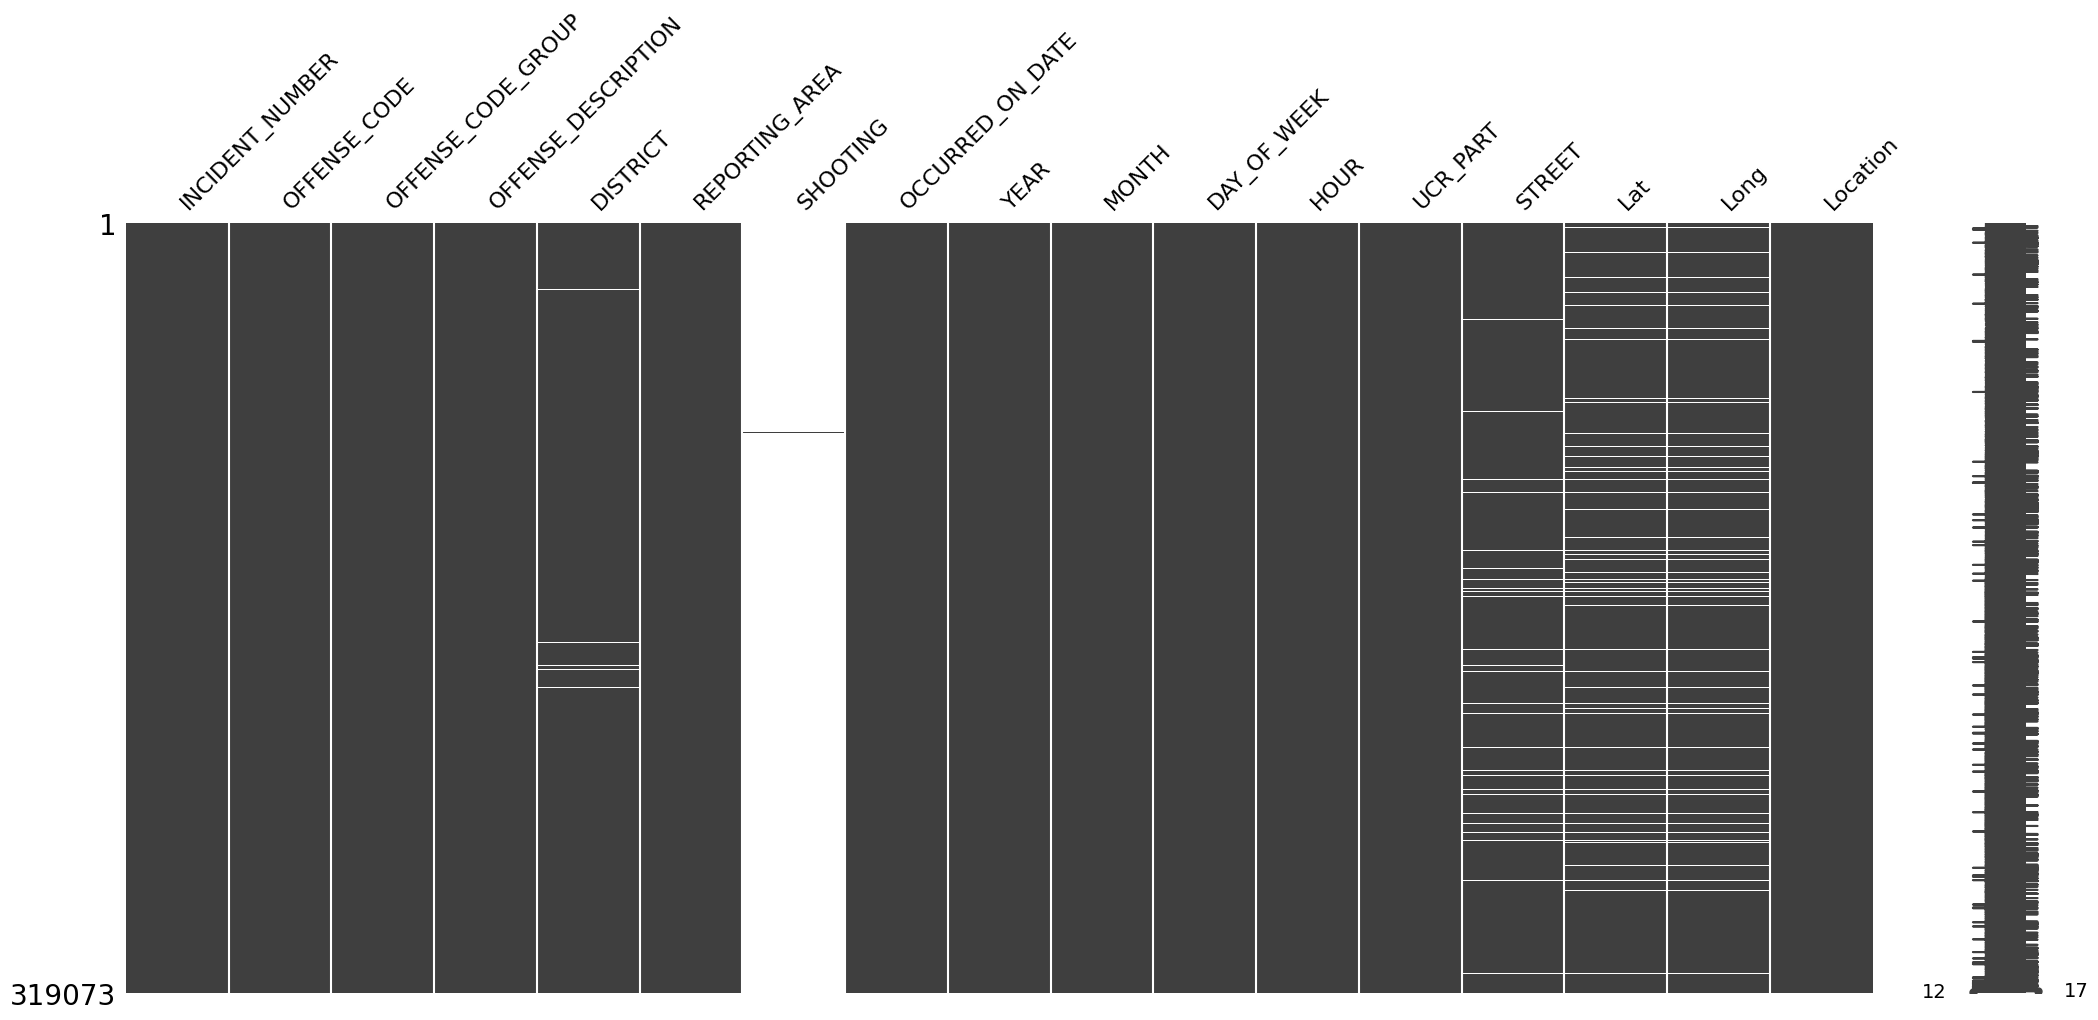

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

# **DATA CLEANING**

* Check

# *What are the Columns our data contains?*

In [ ]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

# *Check for Duplication*

In [ ]:
df.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

# *Missing Values Calculation*

In [ ]:
df.isnull().sum()

In [ ]:
(df.isnull().sum()/(len(df)))*100

INCIDENT_NUMBER         0.000000
OFFENSE_CODE            0.000000
OFFENSE_CODE_GROUP      0.000000
OFFENSE_DESCRIPTION     0.000000
DISTRICT                0.553165
REPORTING_AREA          0.000000
SHOOTING               99.680637
OCCURRED_ON_DATE        0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY_OF_WEEK             0.000000
HOUR                    0.000000
UCR_PART                0.028207
STREET                  3.407057
Lat                     6.267845
Long                    6.267845
Location                0.000000
dtype: float64

# *Data Imputation*

In [ ]:
# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Fill categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)

<ipython-input-23-a57177ae14ae>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df.ffill(inplace=True)  # Forward fill

df.bfill(inplace=True)  # Backward fill

In [ ]:
print("The dimension:", df.shape)

The dimension: (319073, 17)


# *EDA Exploratory Data Analysis*

* Cases Reporting in an YEAR



In [ ]:
df['YEAR'].value_counts()

2017    100886
2016     99114
2018     65685
2015     53388
Name: YEAR, dtype: int64

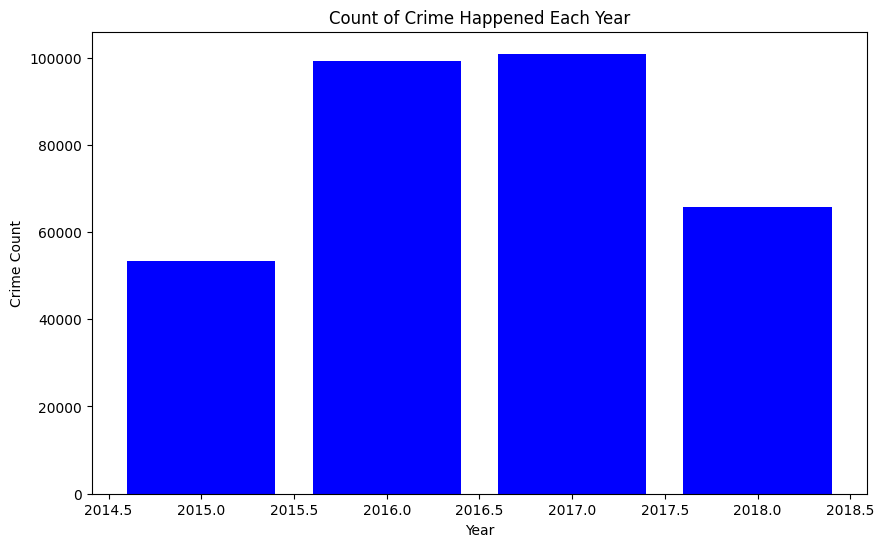

In [ ]:
# Assuming df is your DataFrame
crime_counts = df['YEAR'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(crime_counts.index, crime_counts.values, color='blue')
plt.title('Count of Crime Happened Each Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

* Distribution of Crimes across different Hours of the day.

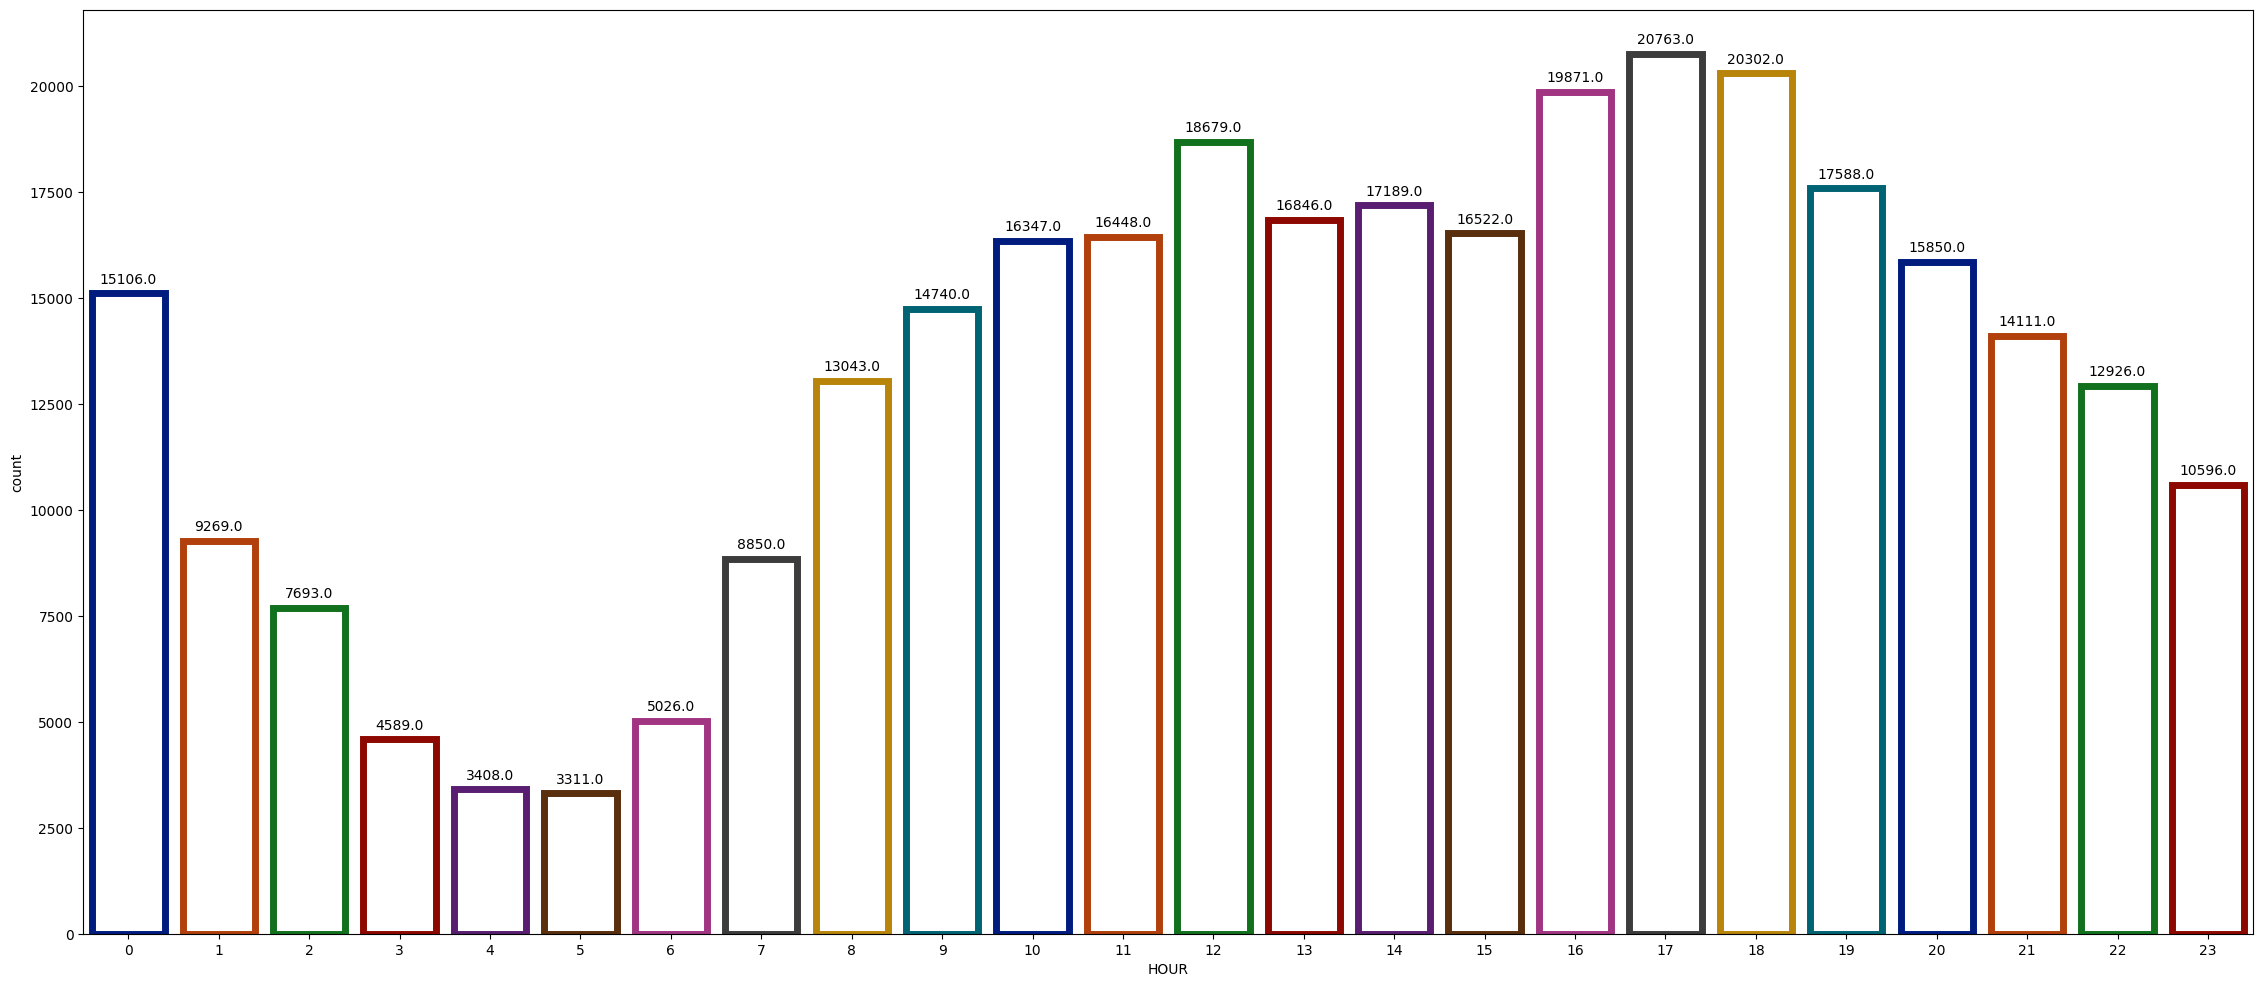

In [ ]:
plt.figure(figsize=(28, 12))
ax = sns.countplot(x="HOUR", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


* Day with the least number of reported crimes
* Distribution of crimes across different days

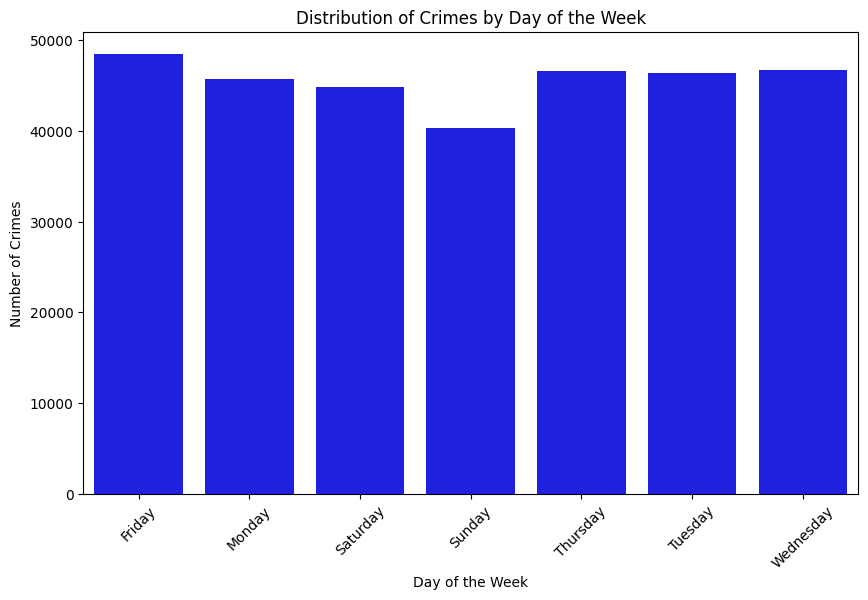

The day with the least number of crimes is: Sunday


In [ ]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

df['Day_of_Week'] = df['OCCURRED_ON_DATE'].dt.day_name()
crime_by_day = df['Day_of_Week'].value_counts().sort_index()
crime_free_day = crime_by_day.idxmin()

plt.figure(figsize=(10, 6))
sns.barplot(x=crime_by_day.index, y=crime_by_day.values, color='blue')

plt.title('Distribution of Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

plt.show()

print(f"The day with the least number of crimes is: {crime_free_day}")


* Distribution of Crime offenses (Plotly - Donut Chart)

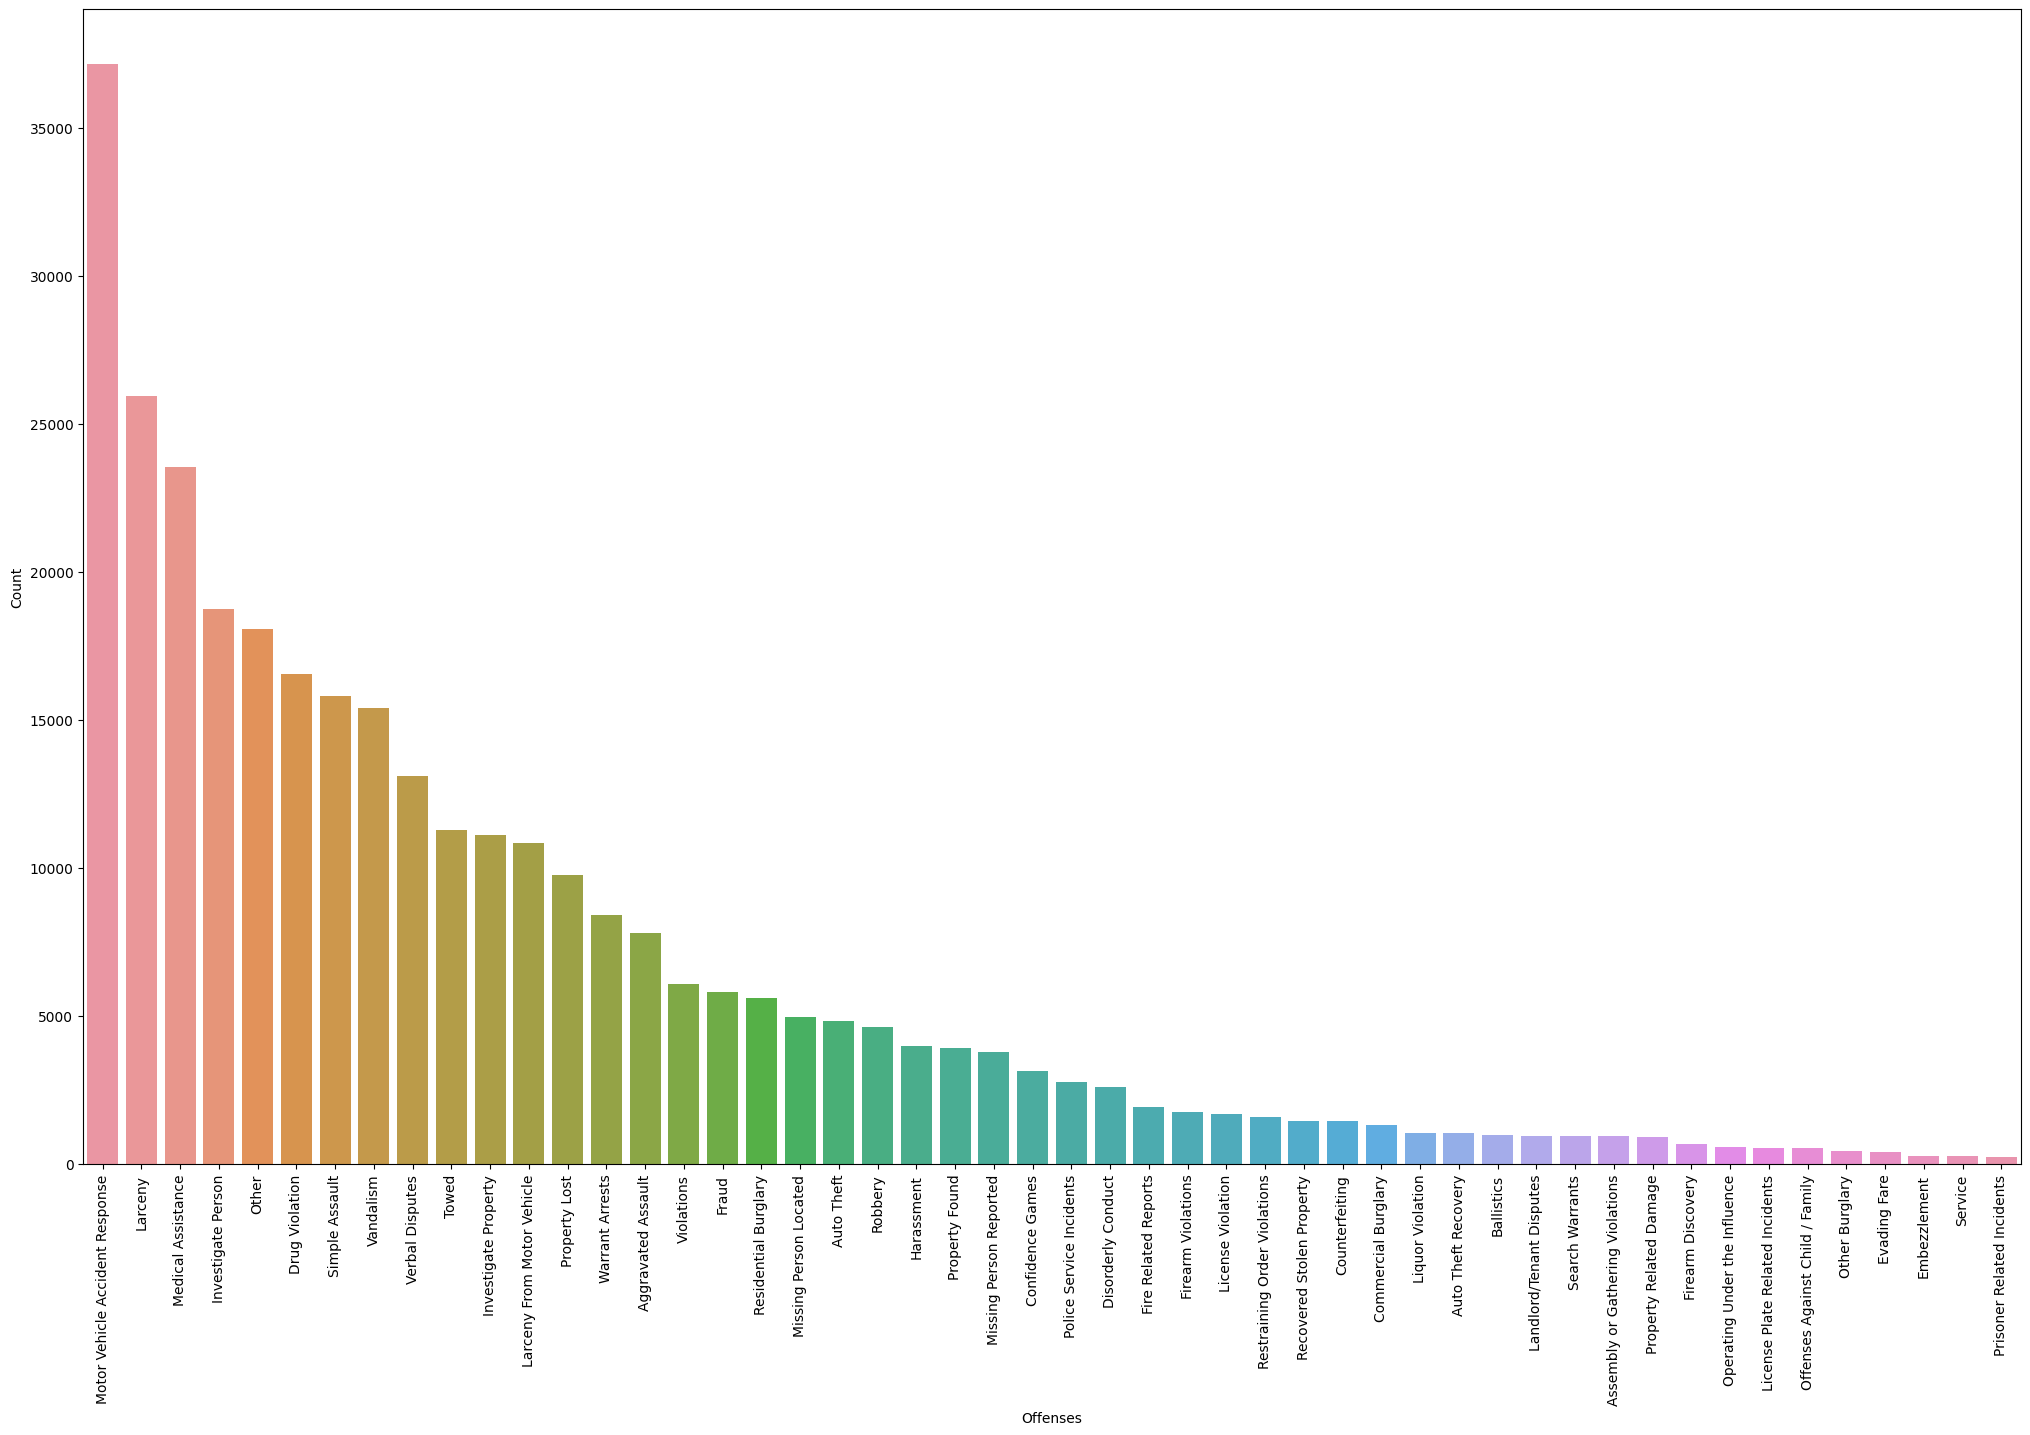

In [ ]:
df2 = pd.DataFrame(columns = ['Offenses'])
df2["Offenses"]=[each for each in df.OFFENSE_CODE_GROUP.unique()]
df2["Count"]=[len(df[df.OFFENSE_CODE_GROUP==each]) for each in df2.Offenses]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Offenses.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Offenses')
plt.ylabel('Count')
plt.show()

* Monthly Crime Trends:

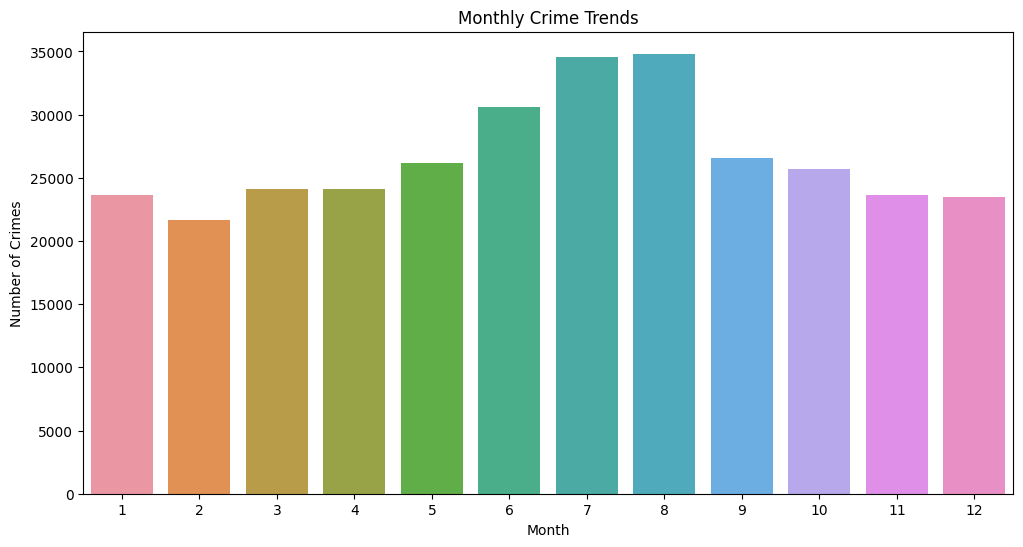

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MONTH', data=df)
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()


* UCR (Uniform Crime Reporting) Part Distribution

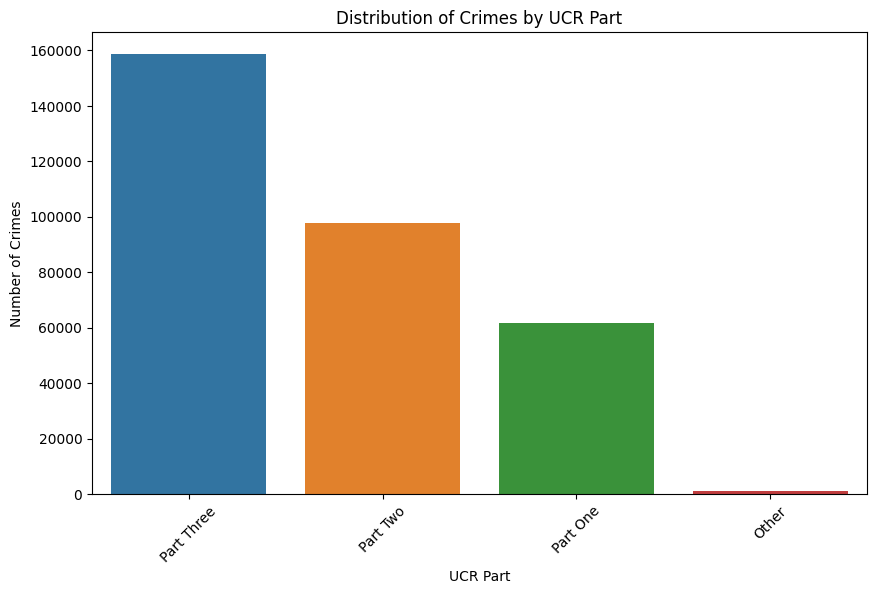

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='UCR_PART', data=df, order=df['UCR_PART'].value_counts().index)
plt.title('Distribution of Crimes by UCR Part')
plt.xlabel('UCR Part')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

* Crime Distribution by UCR Part and Year:

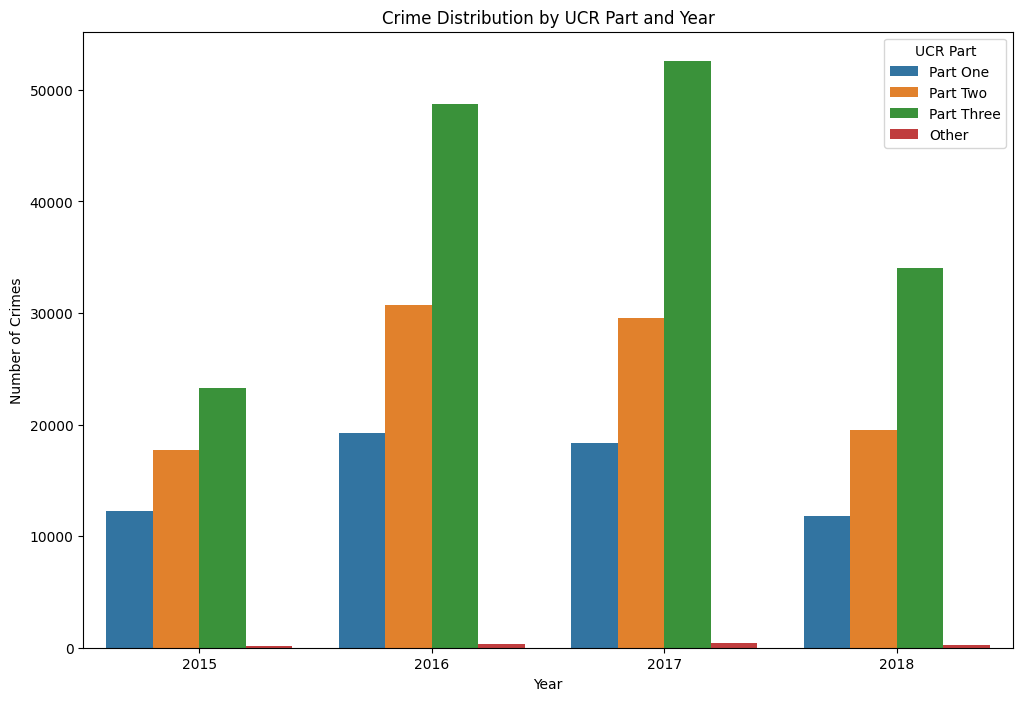

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='YEAR', hue='UCR_PART', data=df)
plt.title('Crime Distribution by UCR Part and Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='UCR Part', loc='upper right')
plt.show()

